In [16]:
pip install PyWavelets


In [0]:
import pywt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# **METHODS**

In [0]:
def reconstruction_error(original_serie,reconstructed_serie):
  """
  calculer l erreur de reconstruction pour une timeSerie
  """
  a=np.array(original_serie)
  b=np.array(reconstructed_serie)
  difference=(b-a)**2
  error=np.sqrt(np.sum(difference))


  return error

In [0]:
def mean_reconstruction_error(df_original_data,df_reduced_data,df_coeff_data):
  """
  permet de calculer la moyenne des erreur d'un data set complet
  """
  erreur=[]
  for i in range(0,50000):
    reconstructed_data=data_reconstruction(df_reduced_data[i],df_coeff_data[i])
    erreur.append(reconstruction_error(df_original_data[i],reconstructed_data))
  return np.mean(erreur)

In [0]:
def read_series(filename,vers):
  """
  on va lire le fichier soit de coeff ou de data on aura besoin de la vers
  256 fichier de base (1024byte)
  32 fichier reduit a 128 byte
  16 fichier reduit a 64 bytes
  8 fichier reduit a 32 byte
  """
  
  time_series = np.fromfile(filename, dtype=np.float32).reshape(-1, vers)
  t=time_series.transpose()
  df= pd.DataFrame(t)
  return df

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def pos_coeff_extraction(df_merged):
  """
  ici on doit extracter les coefficient des position vu qu'il sont merger
  on retourne de data_frame 1 pour les coefficient et un pour les indices
  ex : 150.58789 pos:15 coef:0.58789
  """
  df_indice=pd.DataFrame()
  df_coeff=pd.DataFrame()
  
  lenght=len(df_merged[0])
  for i in range(0,50000):
    coefficient=[]
    indice=[]
    for j in range(0,lenght):
      val=abs(df_merged[i][j])
      position=val//10
      coef_value=val%10
      if df_merged[i][j] < 0 :
        coef_value*=-1
      coefficient.append(coef_value)    
      indice.append(position)
    df_indice[i]=indice
    df_coeff[i]=coefficient

  return df_coeff,df_indice        


In [0]:
def reconstruction_coefficient(coefficient_reduit , indice_coefficient):
  """
  Cette fonction recontruit le tableau de coefficient suivant les indices des coefficients
  """
  
  coefficient_reconstruit = []
  for dimension in range(0,len(coefficient_reduit)):
    
    coeff_reconstruit = np.array([])
    j = 0
    c = [ 128, 64 , 32, 16, 8, 4, 2 ]
    for i in range(0,c[dimension]):
      if j < len(indice_coefficient[dimension]) and i == indice_coefficient[dimension][j]:
        coeff_reconstruit = np.append(coeff_reconstruit, coefficient_reduit[dimension][j])
        j+=1
      else:
        coeff_reconstruit = np.append(coeff_reconstruit,0.0)
    coefficient_reconstruit.append(coeff_reconstruit)

  
  return coefficient_reconstruit

In [0]:
def coeff_pos_128(df_reduced_coefficient_merged):
  coefficient=[]
  df_coef,df_indice=pos_coeff_extraction(df_reduced_coefficient_merged)
  df_coef_tabule=pd.DataFrame()
  df_indice_tabule=pd.DataFrame()
  df_coef_finale=pd.DataFrame()
  l=[]
  coefficient=[]
  indice=[] 


  for i in range(0,50000):
    coefficient.append(list(df_coef[i][0:16]))
    coefficient.append(list(df_coef[i][16:24]))
    coefficient.append(list(df_coef[i][24:32]))
    
    indice.append(list(df_indice[i][0:16]))
    indice.append(list(df_indice[i][16:24]))
    indice.append(list(df_indice[i][24:32]))
    df_coef_tabule[i]=coefficient
    #tabule pour dire que ces liste sont des liste de liste selon les transformations
    df_indice_tabule[i]=indice
    l=reconstruction_coefficient(coefficient,indice)
    df_coef_finale[i]=l
    #df_conef finale contient les tableaux de coeff initial avec leur taille réel
    coefficient=[]
    indice=[]  
  
  return df_coef_finale,df_coef_tabule,df_indice_tabule




In [0]:
def coeff_pos_64(df_reduced_coefficient_merged):
  coefficient=[]
  df_coef,df_indice=pos_coeff_extraction(df_reduced_coefficient_merged)
  df_coef_tabule=pd.DataFrame()
  df_indice_tabule=pd.DataFrame()
  df_coef_finale=pd.DataFrame()
  l=[]
  coefficient=[]
  indice=[] 
  for i in range(0,50000):
    coefficient.append(list(df_coef[i][0:4]))
    coefficient.append(list(df_coef[i][4:8]))
    coefficient.append(list(df_coef[i][8:12]))
    coefficient.append(list(df_coef[i][12:16]))
    
    indice.append(list(df_indice[i][0:4]))
    indice.append(list(df_indice[i][4:8]))
    indice.append(list(df_indice[i][8:12]))
    indice.append(list(df_indice[i][12:16]))
    
    df_coef_tabule[i]=coefficient
    df_indice_tabule[i]=indice
    df_coef_finale[i]=reconstruction_coefficient(coefficient,indice)
    coefficient=[]
    indice=[]  
  
  return df_coef_finale,df_coef_tabule,df_indice_tabule

In [0]:
def coeff_pos_32(df_reduced_coefficient_merged):  
  coefficient=[]
  df_coef,df_indice=pos_coeff_extraction(df_reduced_coefficient_merged)
  df_coef_tabule=pd.DataFrame()
  df_indice_tabule=pd.DataFrame()
  df_coef_finale=pd.DataFrame()
  l=[]
  coefficient=[]
  indice=[] 
  for i in range(0,50000):
    coefficient.append(list(df_coef[i][0:2]))
    coefficient.append(list(df_coef[i][2:4]))
    coefficient.append(list(df_coef[i][4:6]))
    coefficient.append(list(df_coef[i][6:7]))
    coefficient.append(list(df_coef[i][7:8]))
    
    indice.append(list(df_indice[i][0:2]))
    indice.append(list(df_indice[i][2:4]))
    indice.append(list(df_indice[i][4:6]))
    indice.append(list(df_indice[i][6:7]))
    indice.append(list(df_indice[i][7:8]))
    
    df_coef_tabule[i]=coefficient
    df_indice_tabule[i]=indice
    df_coef_finale[i]=reconstruction_coefficient(coefficient,indice)
    coefficient=[]
    indice=[]  
  
  return df_coef_finale,df_coef_tabule,df_indice_tabule

In [0]:
def coefficient_position_reconstruction(df_reduced_coefficient_merged):
  """
  ici on a une liste continue on doit reconstruire une liste de liste 
  qui sera utilise a la reconstruction du data set
  une liste 
  """
  
  if len(df_reduced_coefficient_merged[0])==32:
    df_coef_finale,df_coef_tabule,df_indice_tabule=coeff_pos_128(df_reduced_coefficient_merged)

  elif len(df_reduced_coefficient_merged[0])==16:
    #64 byte
      df_coef_finale,df_coef_tabule,df_indice_tabule=coeff_pos_64(df_reduced_coefficient_merged)  
  else:
    #32byte
      df_coef_finale,df_coef_tabule,df_indice_tabule=coeff_pos_32(df_reduced_coefficient_merged)
  
  return df_coef_finale,df_coef_tabule,df_indice_tabule

  


In [0]:
def data_reconstruction(data_reduced,coefficient):
  for i in range(len(coefficient)-1,-1,-1):
    data_reduced = pywt.idwt(data_reduced, coefficient[i],'sym5',mode="per")
  data_reconstructed=data_reduced
  return data_reconstructed
  

# **SYNTHETIC MEAN ERROR**

In [0]:
df_reduced_data_128=read_series("/content/drive/My Drive/Colab Notebooks/data science/reduced_synthetic/red_synthetic_50k_128.bin",32)
df_reduced_coeff_128=read_series("/content/drive/My Drive/Colab Notebooks/data science/reduced_synthetic/coef_synthetic_50k_128.bin",32)
df_reduced_data_64=read_series("/content/drive/My Drive/Colab Notebooks/data science/reduced_synthetic/red_synthetic_50k_64.bin",16)
df_reduced_coeff_64=read_series("/content/drive/My Drive/Colab Notebooks/data science/reduced_synthetic/coef_synthetic_50k_64.bin",16)
df_reduced_data_32=read_series("/content/drive/My Drive/Colab Notebooks/data science/reduced_synthetic/red_synthetic_50k_32.bin",8)
df_reduced_coeff_32=read_series("/content/drive/My Drive/Colab Notebooks/data science/reduced_synthetic/coef_synthetic_50k_32.bin",8)
df_original_data=read_series("/content/drive/My Drive/Colab Notebooks/data science/reduced_synthetic/synthetic_size50k_len256_znorm.bin",256)


moyenne erreur synth: 1.8096655704513396 


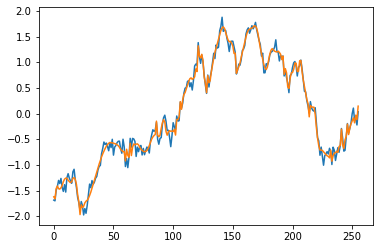

In [41]:
#data128
df1,df2,df3=coefficient_position_reconstruction(df_reduced_coeff_128)
moy_128=mean_reconstruction_error(df_original_data,df_reduced_data_128,df1)
print("moyenne erreur synth: {0} ".format(moy_128))
plt.plot(df_original_data[0])
rec=data_reconstruction(df_reduced_data_128[0],df1[0])
plt.plot(rec)
plt.show()


moyenne erreur synth: 2.825238910875939 


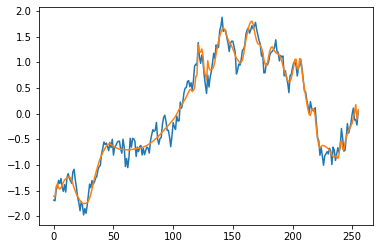

In [42]:
#data64
df1,df2,df3=coefficient_position_reconstruction(df_reduced_coeff_64)
moy_64=mean_reconstruction_error(df_original_data,df_reduced_data_64,df1)
print("moyenne erreur synth: {0} ".format(moy_64))
plt.plot(df_original_data[0])
rec=data_reconstruction(df_reduced_data_64[0],df1[0])
plt.plot(rec)
plt.show()

moyenne erreur synth: 4.920431781944958 


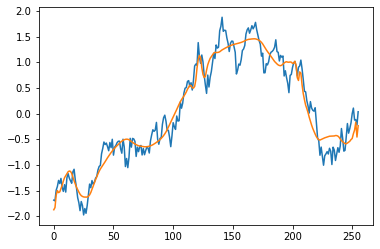

In [43]:
#data32
df1,df2,df3=coefficient_position_reconstruction(df_reduced_coeff_32)
moy_32=mean_reconstruction_error(df_original_data,df_reduced_data_32,df1)
print("moyenne erreur synth: {0} ".format(moy_32))
plt.plot(df_original_data[0])
rec=data_reconstruction(df_reduced_data_32[0],df1[0])
plt.plot(rec)
plt.show()

# **SIESMIC MEAN ERROR**

In [0]:
df_reduced_seismic_data_128=read_series("/content/drive/My Drive/Colab Notebooks/data science/reduced_siesmic/red_seismic_50k_128.bin",32)
df_reduced_seismic_coeff_128=read_series("/content/drive/My Drive/Colab Notebooks/data science/reduced_siesmic/coef_seismic_50k_128.bin",32)
df_reduced_seismic_data_64=read_series("/content/drive/My Drive/Colab Notebooks/data science/reduced_siesmic/red_seismic_50k_64.bin",16)
df_reduced_seismic_coeff_64=read_series("/content/drive/My Drive/Colab Notebooks/data science/reduced_siesmic/coef_seismic_50k_64.bin",16)
df_reduced_seismic_data_32=read_series("/content/drive/My Drive/Colab Notebooks/data science/reduced_siesmic/red_seismic_50k_32.bin",8)
df_reduced_seismic_coeff_32=read_series("/content/drive/My Drive/Colab Notebooks/data science/reduced_siesmic/coef_seismic_50k_32.bin",8)
df_original_seismic_data=read_series("/content/drive/My Drive/Colab Notebooks/data science/reduced_siesmic/seismic_size50k_len256_znorm.bin",256)



moyenne erreur synth: 11.209264792968465 


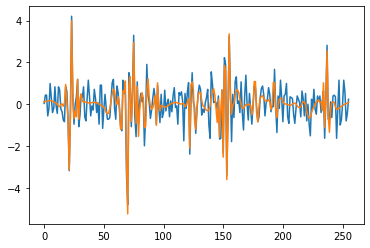

In [33]:
df1,df2,df3=coefficient_position_reconstruction(df_reduced_seismic_coeff_128)
moy_128=mean_reconstruction_error(df_original_seismic_data,df_reduced_seismic_data_128,df1)
print("moyenne erreur synth: {0} ".format(moy_128))
plt.plot(df_original_seismic_data[0])
rec=data_reconstruction(df_reduced_seismic_data_128[0],df1[0])
plt.plot(rec)
plt.show()

moyenne erreur synth: 13.91343617693145 


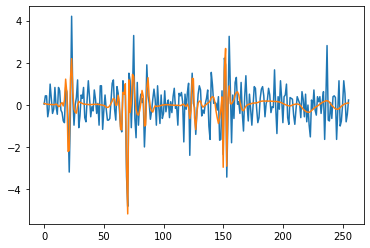

In [36]:
df1,df2,df3=coefficient_position_reconstruction(df_reduced_seismic_coeff_64)
moy_64=mean_reconstruction_error(df_original_seismic_data,df_reduced_seismic_data_64,df1)
print("moyenne erreur synth: {0} ".format(moy_64))
plt.plot(df_original_seismic_data[0])
rec=data_reconstruction(df_reduced_seismic_data_64[0],df1[0])
plt.plot(rec)
plt.show()

moyenne erreur synth: 14.79744769762405 


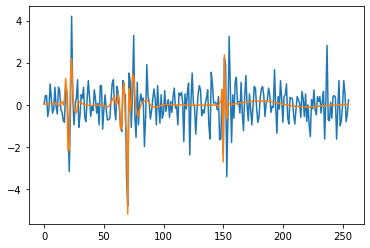

In [37]:
df1,df2,df3=coefficient_position_reconstruction(df_reduced_seismic_coeff_32)
moy_32=mean_reconstruction_error(df_original_seismic_data,df_reduced_seismic_data_32,df1)
print("moyenne erreur synth: {0} ".format(moy_32))
plt.plot(df_original_seismic_data[0])
rec=data_reconstruction(df_reduced_seismic_data_32[0],df1[0])
plt.plot(rec)
plt.show()